In [1]:
import torch

# Simulated predictions and targets (replace with actual data)
predictions = torch.tensor([1, 1, 0, 0])
targets = torch.tensor([0, 1, 0, 0])

# Calculate the multiclass confusion matrix
confusion_matrix = torch.zeros(2, 2)

for t, p in zip(targets, predictions):
    confusion_matrix[t, p] += 1

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

c:\Users\mhajj\Documents\RUTILEA\rutilea_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mhajj\Documents\RUTILEA\rutilea_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\mhajj\Documents\RUTILEA\rutilea_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Confusion Matrix:
tensor([[2., 1.],
        [0., 1.]])


In [2]:
import torch

# Simulated predictions and targets (replace with actual data)
predictions = torch.tensor([0, 1, 2, 0, 2, 1])
targets = torch.tensor([0, 1, 2, 1, 2, 0])

# Calculate the multiclass confusion matrix
confusion_matrix = torch.zeros(3, 3)

for t, p in zip(targets, predictions):
    confusion_matrix[t, p] += 1

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
tensor([[1., 1., 0.],
        [1., 1., 0.],
        [0., 0., 2.]])


In [3]:
import torch

# Compute the confusion matrix as before (replace this with your actual confusion matrix)
confusion_matrix = torch.tensor([[50, 5, 5],
                                 [2, 45, 3],
                                 [4, 6, 40]])

# Calculate precision, recall, and F1-score for each class
num_classes = confusion_matrix.size(0)
precision = torch.zeros(num_classes)
recall = torch.zeros(num_classes)
f1_score = torch.zeros(num_classes)

for i in range(num_classes):
    true_positives = confusion_matrix[i, i]
    false_positives = confusion_matrix[:, i].sum() - true_positives
    false_negatives = confusion_matrix[i, :].sum() - true_positives
    
    # Calculate precision, recall, and F1-score, handling zero denominators
    precision[i] = true_positives / max((true_positives + false_positives), 1e-12)
    recall[i] = true_positives / max((true_positives + false_negatives), 1e-12)
    f1_score[i] = 2 * (precision[i] * recall[i]) / max((precision[i] + recall[i]), 1e-12)

# Print precision, recall, and F1-score for each class
for i in range(num_classes):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1_score[i]:.4f}")


Class 0: Precision=0.8929, Recall=0.8333, F1-Score=0.8621
Class 1: Precision=0.8036, Recall=0.9000, F1-Score=0.8491
Class 2: Precision=0.8333, Recall=0.8000, F1-Score=0.8163


In [4]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# batch_size
batch_size = 8

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        print(self.conv1)
        print(self.conv2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # print(self.fc1(x))
        # print(self.fc2(x))

        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))


In [6]:
running_loss = 0.0
accuracy = 0.0
epochs = 1
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0} lr: {1}'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            print("Training loss {} Steps: {}".format(running_loss / 1000, epoch * len(trainloader) + i))
            running_loss = 0.0
print('Finished Training')

Epoch-1 lr: 0.001
Training loss 1.6697744313180447 Steps: 999
Training loss 0.7847381429076195 Steps: 1999
Training loss 0.7053816911913454 Steps: 2999
Training loss 0.6276089332997798 Steps: 3999
Training loss 0.5652219760995358 Steps: 4999
Training loss 0.5329760470315814 Steps: 5999
Training loss 0.5077671079039574 Steps: 6999
Finished Training


In [7]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[8 9 1 9 1 8 1 7]
[8 9 1 9 1 8 1 5]


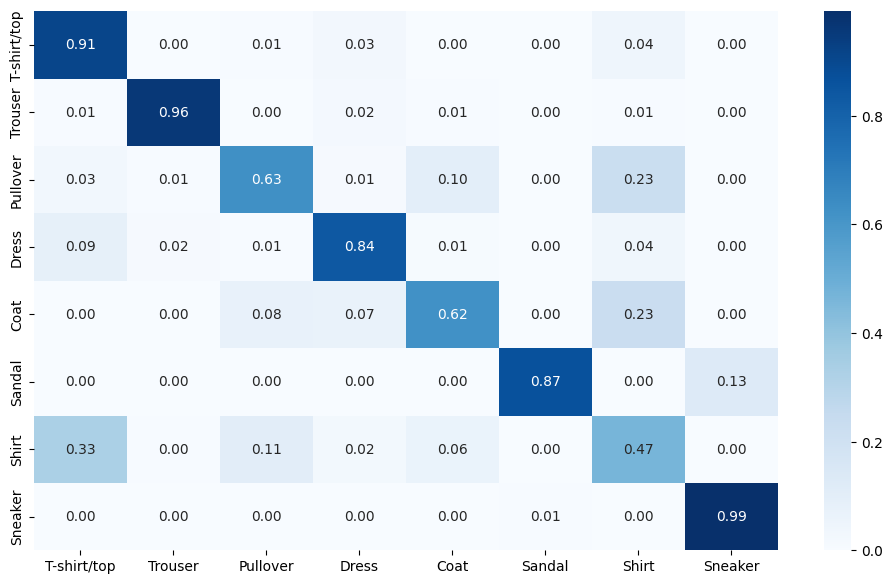

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

print(output)
print(labels)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(len(classes)))
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.savefig('output.png')

Confusion matrix, without normalization
[[905   2   7  28   2   2  44   0  10   0]
 [  7 959   0  23   5   0   5   0   1   0]
 [ 31   5 622  12  98   0 226   0   6   0]
 [ 89  15   6 837  11   0  41   0   1   0]
 [  2   2  75  70 617   0 228   0   6   0]
 [  0   0   0   2   0 829   0 125   6  38]
 [326   4 106  24  64   1 460   0  15   0]
 [  0   0   0   0   0   7   0 919   0  74]
 [  8   4   8  11   3   6  26   5 927   2]
 [  1   0   0   0   0   8   0  36   0 955]]


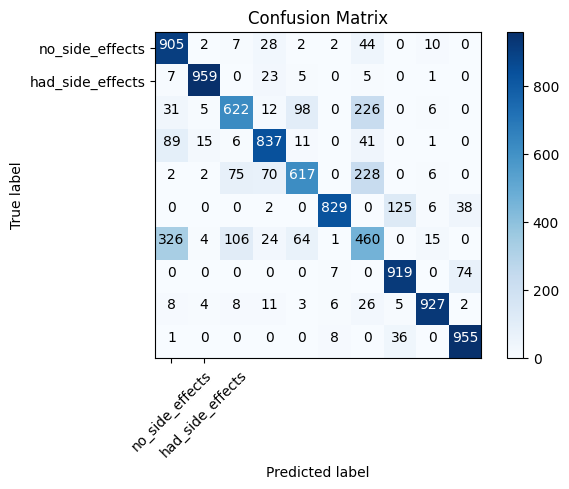

In [9]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Replace true_labels and predicted_labels with your actual data
true_labels = [1, 0, 1, 0, 1, 0]  # True class labels
predicted_labels = [1, 0, 0, 1, 0, 1]  # Predicted class labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[1 2]
 [2 1]]
Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example dataset
true_labels = [0, 1, 2, 3, 0, 1, 2, 3, 4, 4, 5, 5, 6, 6, 7]  # True class labels
predicted_labels = [0, 1, 2, 2, 0, 1, 3, 3, 4, 5, 5, 6, 6, 7, 7]  # Predicted class labels
classes = [0, 1, 2, 3, 4, 5, 6, 7]  # Your 8 class labels

# Initialize dictionaries to store metrics for each class
confusion_matrices = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}

# Loop through each class
for class_label in classes:
    # Create binary labels for the current class vs. all other classes
    binary_true_labels = [1 if label == class_label else 0 for label in true_labels]
    binary_predicted_labels = [1 if label == class_label else 0 for label in predicted_labels]

    # Calculate confusion matrix for the current class
    conf_matrix = confusion_matrix(binary_true_labels, binary_predicted_labels)
    
    # Calculate performance metrics for the current class with zero_division=1.0
    accuracy = accuracy_score(binary_true_labels, binary_predicted_labels)
    precision = precision_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    recall = recall_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    f1 = f1_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    
    # Store the metrics in their respective dictionaries with the class label as the key
    confusion_matrices[class_label] = conf_matrix
    accuracies[class_label] = accuracy
    precisions[class_label] = precision
    recalls[class_label] = recall
    f1_scores[class_label] = f1

# Print the confusion matrices and metrics for each class
for class_label in classes:
    print(f"Class {class_label}:")
    print("Confusion Matrix:")
    print(confusion_matrices[class_label])
    print("Accuracy:", accuracies[class_label])
    print("Precision:", precisions[class_label])
    print("Recall:", recalls[class_label])
    print("F1 Score:", f1_scores[class_label])
    print()


Class 0:
Confusion Matrix:
[[13  0]
 [ 0  2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 1:
Confusion Matrix:
[[13  0]
 [ 0  2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 2:
Confusion Matrix:
[[12  1]
 [ 1  1]]
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Class 3:
Confusion Matrix:
[[12  1]
 [ 1  1]]
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Class 4:
Confusion Matrix:
[[13  0]
 [ 1  1]]
Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666

Class 5:
Confusion Matrix:
[[12  1]
 [ 1  1]]
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Class 6:
Confusion Matrix:
[[12  1]
 [ 1  1]]
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Class 7:
Confusion Matrix:
[[13  1]
 [ 0  1]]
Accuracy: 0.9333333333333333
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666



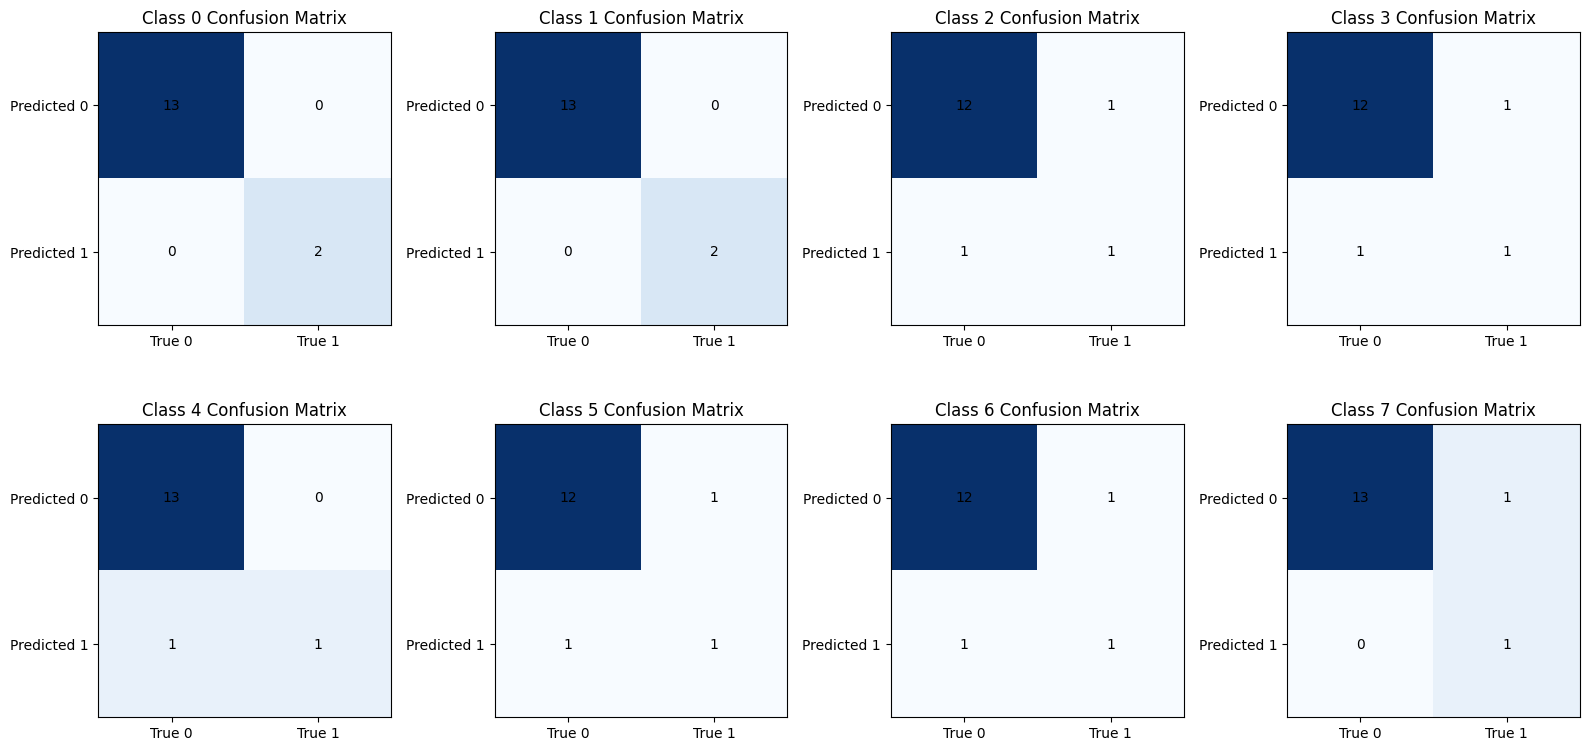

Metrics for Class 0:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Metrics for Class 1:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Metrics for Class 2:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class 3:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class 4:
Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666

Metrics for Class 5:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class 6:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class 7:
Accuracy: 0.9333333333333333
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666



In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example dataset
true_labels = [0, 1, 2, 3, 0, 1, 2, 3, 4, 4, 5, 5, 6, 6, 7]  # True class labels
predicted_labels = [0, 1, 2, 2, 0, 1, 3, 3, 4, 5, 5, 6, 6, 7, 7]  # Predicted class labels
classes = [0, 1, 2, 3, 4, 5, 6, 7]  # Your 8 class labels

# Initialize dictionaries to store metrics for each class
confusion_matrices = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}

# Loop through each class
for class_label in classes:
    # Create binary labels for the current class vs. all other classes
    binary_true_labels = [1 if label == class_label else 0 for label in true_labels]
    binary_predicted_labels = [1 if label == class_label else 0 for label in predicted_labels]

    # Calculate confusion matrix for the current class
    conf_matrix = confusion_matrix(binary_true_labels, binary_predicted_labels)
    
    # Calculate performance metrics for the current class with zero_division=1.0
    accuracy = accuracy_score(binary_true_labels, binary_predicted_labels)
    precision = precision_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    recall = recall_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    f1 = f1_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    
    # Store the metrics in their respective dictionaries with the class label as the key
    confusion_matrices[class_label] = conf_matrix
    accuracies[class_label] = accuracy
    precisions[class_label] = precision
    recalls[class_label] = recall
    f1_scores[class_label] = f1

# Plot confusion matrices for all classes
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, class_label in enumerate(classes):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    im = ax.imshow(confusion_matrices[class_label], cmap='Blues', interpolation='nearest')
    ax.set_title(f"Class {class_label} Confusion Matrix")
    tick_marks = np.arange(2)  # Only two tick marks, 0 and 1
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(['True 0', 'True 1'])
    ax.set_yticklabels(['Predicted 0', 'Predicted 1'])

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(confusion_matrices[class_label][i, j]), ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# Print metrics for each class
for class_label in classes:
    print(f"Metrics for Class {class_label}:")
    print("Accuracy:", accuracies[class_label])
    print("Precision:", precisions[class_label])
    print("Recall:", recalls[class_label])
    print("F1 Score:", f1_scores[class_label])
    print()


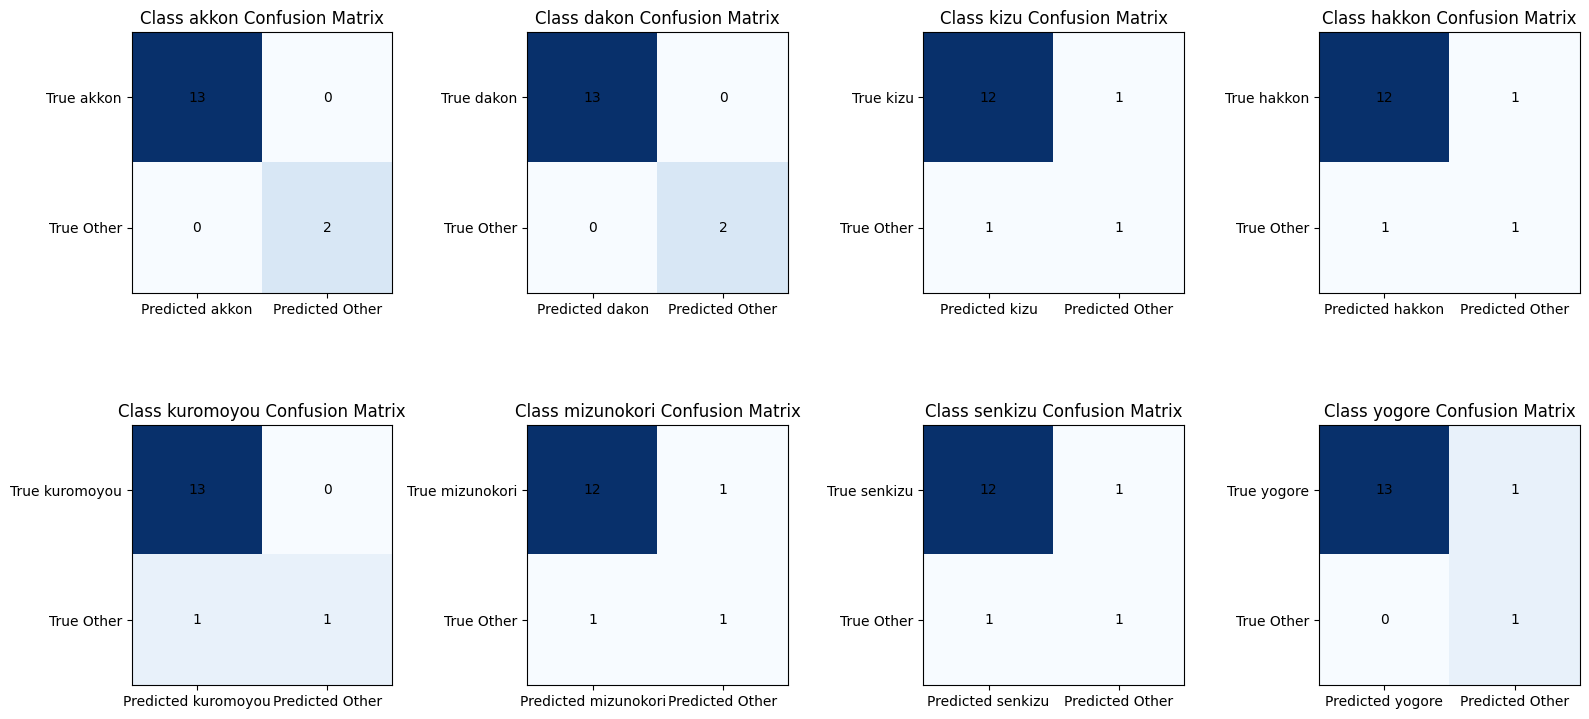

Metrics for Class akkon:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Metrics for Class dakon:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Metrics for Class kizu:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class hakkon:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class kuromoyou:
Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666

Metrics for Class mizunokori:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class senkizu:
Accuracy: 0.8666666666666667
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Metrics for Class yogore:
Accuracy: 0.9333333333333333
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example dataset
true_labels = [0, 1, 2, 3, 0, 1, 2, 3, 4, 4, 5, 5, 6, 6, 7]  # True class labels
predicted_labels = [0, 1, 2, 2, 0, 1, 3, 3, 4, 5, 5, 6, 6, 7, 7]  # Predicted class labels
class_names = ['akkon', 'dakon', 'kizu', 'hakkon', 'kuromoyou', 'mizunokori', 'senkizu', 'yogore']  # Your class names

# Initialize dictionaries to store metrics for each class
confusion_matrices = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}

# Loop through each class
for class_idx, class_name in enumerate(class_names):
    # Create binary labels for the current class vs. all other classes
    binary_true_labels = [1 if label == class_idx else 0 for label in true_labels]
    binary_predicted_labels = [1 if label == class_idx else 0 for label in predicted_labels]

    # Calculate confusion matrix for the current class
    conf_matrix = confusion_matrix(binary_true_labels, binary_predicted_labels)
    
    # Calculate performance metrics for the current class with zero_division=1.0
    accuracy = accuracy_score(binary_true_labels, binary_predicted_labels)
    precision = precision_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    recall = recall_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    f1 = f1_score(binary_true_labels, binary_predicted_labels, zero_division=1.0)
    
    # Store the metrics in their respective dictionaries with the class name as the key
    confusion_matrices[class_name] = conf_matrix
    accuracies[class_name] = accuracy
    precisions[class_name] = precision
    recalls[class_name] = recall
    f1_scores[class_name] = f1

# Plot confusion matrices for all classes
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, class_name in enumerate(class_names):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    im = ax.imshow(confusion_matrices[class_name], cmap='Blues', interpolation='nearest')
    ax.set_title(f"Class {class_name} Confusion Matrix")
    
    # Customize tick labels based on your class names
    tick_marks = np.arange(2)  # Two classes: 0 and 1
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels([f'Predicted {class_name}', f'Predicted Other'])
    ax.set_yticklabels([f'True {class_name}', f'True Other'])

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(confusion_matrices[class_name][i, j]), ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# Print metrics for each class
for class_name in class_names:
    print(f"Metrics for Class {class_name}:")
    print("Accuracy:", accuracies[class_name])
    print("Precision:", precisions[class_name])
    print("Recall:", recalls[class_name])
    print("F1 Score:", f1_scores[class_name])
    print()
